In [1]:
import tensorflow as tf 
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns 


c:\Users\nishi\Desktop\Projects\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
#import dataset
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 1095s 6us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [27]:
y_train=y_train.reshape(-1,)


In [28]:
y_test=y_test.reshape(-1,)

In [29]:

y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [30]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [34]:
def display_image(X,y,index):
    plt.figure(figsize=(12,3))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.show()


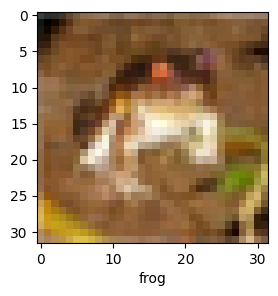

In [35]:
display_image(X_train,y_train,0)

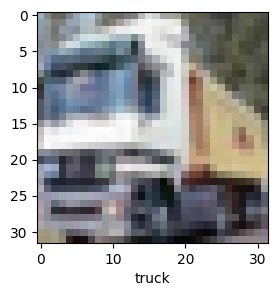

In [36]:
display_image(X_train,y_train,1)

In [37]:
#normalizing the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [40]:
#ANN
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
            )
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 48ms/step - accuracy: 0.3538 - loss: 1.8104
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.4271 - loss: 1.6199
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.4578 - loss: 1.5402
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.4776 - loss: 1.4816
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.4994 - loss: 1.4310


In [41]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.42      0.50      1000
           1       0.74      0.41      0.52      1000
           2       0.31      0.50      0.38      1000
           3       0.42      0.15      0.22      1000
           4       0.49      0.28      0.35      1000
           5       0.39      0.41      0.40      1000
           6       0.39      0.75      0.51      1000
           7       0.60      0.49      0.54      1000
           8       0.50      0.74      0.60      1000
           9       0.58      0.56      0.57      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [42]:
#CNN
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\Users\nishi\Desktop\Projects\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [44]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.4903 - loss: 1.4213
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6221 - loss: 1.0777
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.6709 - loss: 0.9445
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7044 - loss: 0.8584
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7280 - loss: 0.7842
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7455 - loss: 0.7266
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7663 - loss: 0.6691
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7846 - loss: 0.6211
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.7984 - loss: 0.5772
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.8128 - loss: 0.5314


In [ ]:
cnn.evaluate(X_test,y_test)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]



In [ ]:
y_test[:5]